<a href="https://colab.research.google.com/github/Piyush434/Machine-Learning/blob/main/Ensemble_Learning_Activity_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
lc = pd.read_csv("/content/drive/My Drive/cancer patient data sets.csv")

In [4]:
lc

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
lc.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

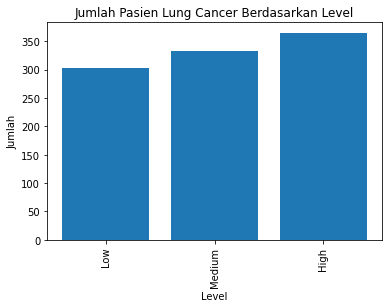

In [7]:
vis1 = lc.groupby(['Level']).count().reset_index()
vis1.sort_values('Patient Id', ascending=True, inplace=True)
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
plt.ylabel('Jumlah')
plt.xlabel('Level')
plt.title('Jumlah Pasien Lung Cancer Berdasarkan Level')
ax.bar(vis1['Level'],vis1['Patient Id'])
plt.xticks(rotation=90)
plt.show()

In [8]:
lc.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [9]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [10]:
lc = lc.drop(columns=['index', 'Patient Id'])
lc.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [11]:
lc.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [12]:
lc['Level'] = encode.fit_transform(lc['Level'])
lc.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


In [13]:
X = lc.iloc[:,:-1]
y = lc['Level']
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:,:]=scaler.fit_transform(X.iloc[:,:])

In [15]:
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0.322034,0.0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,0.166667,0.500000,...,0.375,0.250,0.428571,0.125,0.142857,0.285714,0.000,0.166667,0.333333,0.500000
1,0.050847,0.0,0.285714,0.000000,0.571429,0.285714,0.500000,0.166667,0.166667,0.166667,...,0.250,0.000,0.285714,0.750,1.000000,0.714286,0.125,0.000000,1.000000,0.166667
2,0.355932,0.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,1.000000,...,0.875,0.875,0.857143,1.000,0.142857,0.000000,0.375,0.833333,1.000000,0.166667
3,0.389831,0.0,0.857143,0.857143,0.857143,0.857143,0.833333,1.000000,1.000000,1.000000,...,0.875,0.375,0.142857,0.250,0.000000,0.428571,0.500,0.833333,1.000000,0.666667
4,0.542373,0.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,1.000,0.250,0.142857,0.375,0.000000,0.428571,0.125,0.500000,0.166667,0.333333


# Classification based on ML models

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [17]:

dt = DecisionTreeClassifier(max_depth = 3)

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Metode Decision Tree")
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Metode Decision Tree
Test set accuracy: 0.89
Test set accuracy: 0.8939393939393939


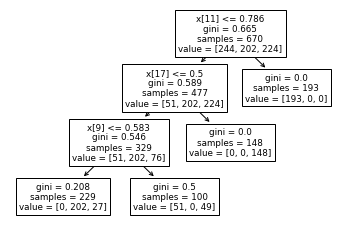

In [18]:
tree.plot_tree(dt);

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       121
           1       0.88      1.00      0.94       101
           2       1.00      0.68      0.81       108

    accuracy                           0.89       330
   macro avg       0.91      0.89      0.89       330
weighted avg       0.91      0.89      0.89       330



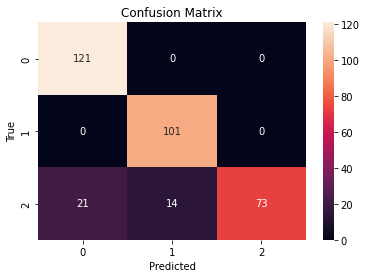

In [19]:
matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred_dt))

In [20]:
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)

# Memprediksi label set test
y_pred_knn = knn.predict(X_test)

#  menghitung set accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Metode K-Nearst Neighboard")
print("Test set accuracy: {:.2f}".format(acc_knn))
print(f"Test set accuracy: {acc_knn}")

Metode K-Nearst Neighboard
Test set accuracy: 1.00
Test set accuracy: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       108

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



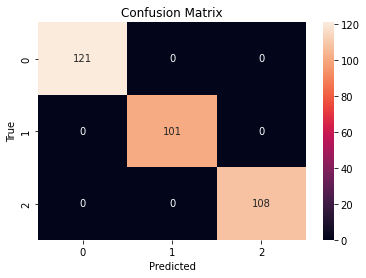

In [21]:
matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred_knn))

In [22]:
from sklearn.svm import SVC

svmModel = SVC()
svmModel.fit(X_train, y_train)
y_pred_svm = svmModel.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM")
print("Test set accuracy: {:.2f}".format(acc_svm))
print(f"Test set accuracy: {acc_svm}")

SVM
Test set accuracy: 1.00
Test set accuracy: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       108

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



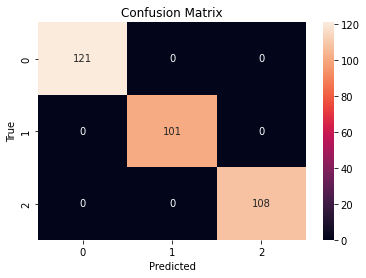

In [23]:
matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred_svm))

In [24]:
from sklearn.neural_network import MLPClassifier

mlpModel = MLPClassifier()
mlpModel.fit(X_train, y_train)
y_pred_mlp = mlpModel.predict(X_test)

acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP Classifier")
print("Test set accuracy: {:.2f}".format(acc_mlp))
print(f"Test set accuracy: {acc_mlp}")

MLP Classifier
Test set accuracy: 0.99
Test set accuracy: 0.990909090909091


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       1.00      1.00      1.00       101
           2       1.00      0.97      0.99       108

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



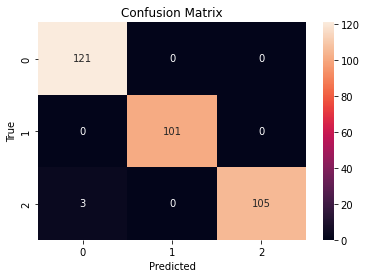

In [25]:
matrix = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred_mlp))

## Comparison

In [26]:
from sklearn.metrics import *

In [27]:
model_comparison = pd.DataFrame({'Decision Tree':[accuracy_score(y_test,y_pred_dt)*100,f1_score(y_test,y_pred_dt,average='macro')*100,recall_score(y_test, y_pred_dt,average='micro')*100,precision_score(y_test, y_pred_dt,average='micro')*100],
                           'KNN':[accuracy_score(y_test,y_pred_knn)*100,f1_score(y_test,y_pred_knn,average='macro')*100,recall_score(y_test, y_pred_knn,average='micro')*100,precision_score(y_test, y_pred_knn,average='micro')*100],
                           'SVM':[accuracy_score(y_test,y_pred_svm)*100,f1_score(y_test,y_pred_svm,average='macro')*100,recall_score(y_test, y_pred_svm,average='micro')*100,precision_score(y_test, y_pred_svm,average='micro')*100],
                           'MLP':[accuracy_score(y_test,y_pred_mlp)*100,f1_score(y_test,y_pred_mlp,average='macro')*100,recall_score(y_test, y_pred_mlp,average='micro')*100,precision_score(y_test, y_pred_mlp,average='micro')*100],
})

In [28]:
print('\n\t\t\t*** Model Comparison ***')
model_comparison.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
model_comparison.head()


			*** Model Comparison ***


,Decision Tree,KNN,SVM,MLP
Accuracy,89.393939,100.0,100.0,99.090909
F1_score,88.732237,100.0,100.0,99.122353
Recall,89.393939,100.0,100.0,99.090909
Precision,89.393939,100.0,100.0,99.090909


In [29]:
model_mae_scores_dict = {'Decision Tree': 90.90, 'KNN': 100.00, 'SVM' : 100.00, 'MLP' : 99.09}
model_mae_scores = pd.Series(model_mae_scores_dict)
model_mae_scores
order = model_mae_scores.sort_values()

Text(0.5, 1.0, 'Mean Average Error of All Models Tested')

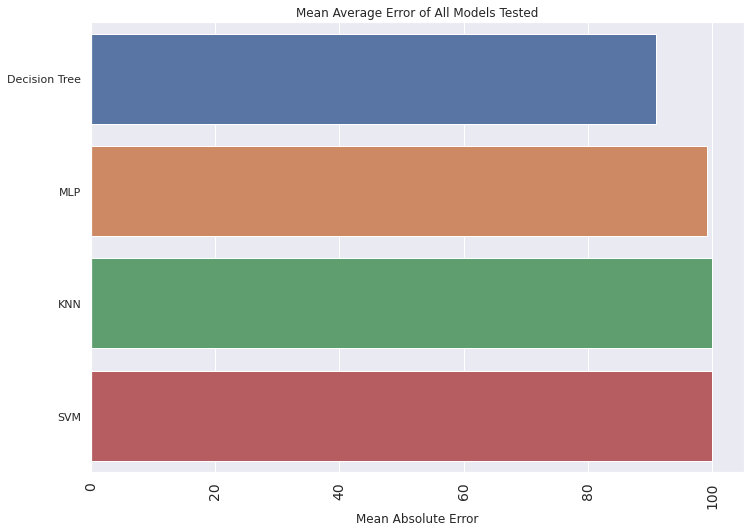

In [30]:
from matplotlib import pyplot
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=order.values, y = order.index, orient='h')

plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical',fontsize=14)
plt.title('Mean Average Error of All Models Tested')  

# Ensemble Learning

In [31]:
from sklearn.ensemble import AdaBoostClassifier

adaModel = AdaBoostClassifier()
adaModel.fit(X_train, y_train)
y_pred_ada = adaModel.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
print("Gradient Boost Classifier")
print("Test set accuracy: {:.2f}".format(acc_ada))
print(f"Test set accuracy: {acc_ada}")
acc_ada

Gradient Boost Classifier
Test set accuracy: 0.69
Test set accuracy: 0.693939393939394


0.693939393939394

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost = GradientBoostingClassifier()
gradBoost.fit(X_train, y_train)
y_pred_gradboost = gradBoost.predict(X_test)

acc_gradboost = accuracy_score(y_test, y_pred_gradboost)
print("Gradient Boost Classifier")
print("Test set accuracy: {:.2f}".format(acc_gradboost))
print(f"Test set accuracy: {acc_gradboost}")
acc_gradboost

Gradient Boost Classifier
Test set accuracy: 1.00
Test set accuracy: 1.0


1.0

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)
y_pred_rf = rfModel.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_mlp)
print("Random Forest Classifier")
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Random Forest Classifier
Test set accuracy: 0.99
Test set accuracy: 0.990909090909091


In [34]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred_voteh = vot_hard.predict(X_test)

score = accuracy_score(y_test, y_pred_voteh)
print("Hard Voting Score % d" % score)
  
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred_votes = vot_soft.predict(X_test)
  
score = accuracy_score(y_test, y_pred_votes)
print("Soft Voting Score % d" % score)

Hard Voting Score  1
Soft Voting Score  1


## Ensemble Learning Comparison

In [35]:
model_comparison2 = pd.DataFrame({'Decision Tree':[accuracy_score(y_test,y_pred_dt)*100,f1_score(y_test,y_pred_dt,average='macro')*100,recall_score(y_test, y_pred_dt,average='micro')*100,precision_score(y_test, y_pred_dt,average='micro')*100],
                           'KNN':[accuracy_score(y_test,y_pred_knn)*100,f1_score(y_test,y_pred_knn,average='macro')*100,recall_score(y_test, y_pred_knn,average='micro')*100,precision_score(y_test, y_pred_knn,average='micro')*100],
                           'SVM':[accuracy_score(y_test,y_pred_svm)*100,f1_score(y_test,y_pred_svm,average='macro')*100,recall_score(y_test, y_pred_svm,average='micro')*100,precision_score(y_test, y_pred_svm,average='micro')*100],
                           'MLP':[accuracy_score(y_test,y_pred_mlp)*100,f1_score(y_test,y_pred_mlp,average='macro')*100,recall_score(y_test, y_pred_mlp,average='micro')*100,precision_score(y_test, y_pred_mlp,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred_ada)*100,f1_score(y_test,y_pred_ada,average='macro')*100,recall_score(y_test, y_pred_ada,average='micro')*100,precision_score(y_test, y_pred_ada,average='micro')*100],
                           'Gradient Boosting':[accuracy_score(y_test,y_pred_gradboost)*100,f1_score(y_test,y_pred_gradboost,average='macro')*100,recall_score(y_test, y_pred_gradboost,average='micro')*100,precision_score(y_test, y_pred_gradboost,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred_rf)*100,f1_score(y_test,y_pred_rf,average='macro')*100,recall_score(y_test, y_pred_rf,average='micro')*100,precision_score(y_test, y_pred_rf,average='micro')*100],
                           'Voting Classifier Hard':[accuracy_score(y_test,y_pred_voteh)*100,f1_score(y_test,y_pred_voteh,average='macro')*100,recall_score(y_test, y_pred_voteh,average='micro')*100,precision_score(y_test, y_pred_voteh,average='micro')*100],
                           'Voting Classifier Soft':[accuracy_score(y_test,y_pred_votes)*100,f1_score(y_test,y_pred_votes,average='macro')*100,recall_score(y_test, y_pred_votes,average='micro')*100,precision_score(y_test, y_pred_votes,average='micro')*100],
})

In [36]:
print('\n\t\t\t*** Model Comparison ***')
model_comparison2.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
model_comparison2.head()


			*** Model Comparison ***


,Decision Tree,KNN,SVM,MLP,Adaboost,Gradient Boosting,Random Forest,Voting Classifier Hard,Voting Classifier Soft
Accuracy,89.393939,100.0,100.0,99.090909,69.393939,100.0,100.0,100.0,100.0
F1_score,88.732237,100.0,100.0,99.122353,56.046267,100.0,100.0,100.0,100.0
Recall,89.393939,100.0,100.0,99.090909,69.393939,100.0,100.0,100.0,100.0
Precision,89.393939,100.0,100.0,99.090909,69.393939,100.0,100.0,100.0,100.0


In [37]:
model_mae_scores_dict = {'Adaboost': 69.39, 'Gradient Boosting': 100.00, 'Random Forest' : 100.00, 'Voting Classifier' : 100.00}
model_mae_scores = pd.Series(model_mae_scores_dict)
model_mae_scores
order = model_mae_scores.sort_values()

Text(0.5, 1.0, 'Mean Average Error of All Models Tested')

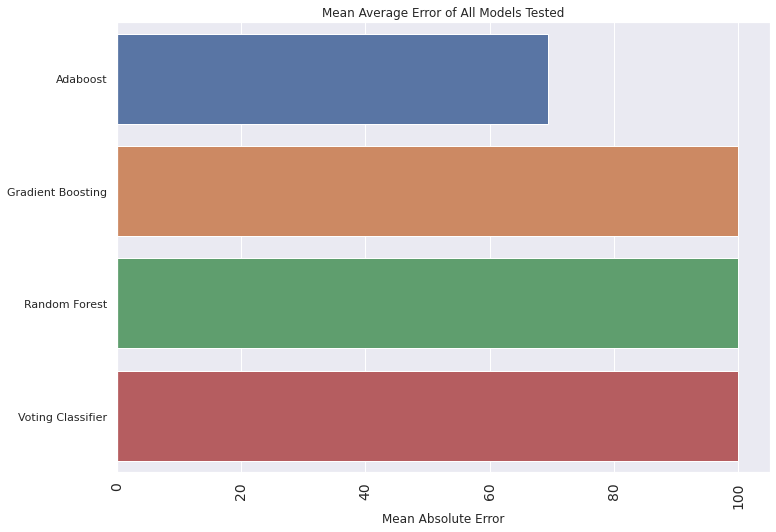

In [38]:
from matplotlib import pyplot
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=order.values, y = order.index, orient='h')

plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical',fontsize=14)
plt.title('Mean Average Error of All Models Tested') 

## Conclusion


KNN as well as SVM are giving 100% accuracy.

Gradient Boosting, Random Forest, Voting Classifier all of the algorithms are giving 100% of accauray.

For Decision Tree, current Decision Tree accuracy is 89.90%. If we increase the depth upto 6, the accuracy will be increased to 100%

Here for Adaboost, it's giving quite less accuracy as compared to other algorithms. This is happening because the dataset has less entropy.

As the dataset is balnced, ensemble learning is giving us 100% accuracy.